# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='~/../images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='~/../images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# loading dataset
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
# renaming column that refers to zipcodes
df.rename({'RegionName': 'Zipcode'}, axis='columns', inplace=True)
df.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
# checking how many unique values we have on each column, besides the time data
df.iloc[:,0:7].nunique()

RegionID      14723
Zipcode       14723
City           7554
State            51
Metro           701
CountyName     1212
SizeRank      14723
dtype: int64

In [5]:
# check main metro areas in terms of datapoints in our dataframe
df.Metro.value_counts()

New York                          779
Los Angeles-Long Beach-Anaheim    347
Chicago                           325
Philadelphia                      281
Washington                        249
Boston                            246
Dallas-Fort Worth                 217
Minneapolis-St Paul               201
Houston                           187
Pittsburgh                        177
Miami-Fort Lauderdale             162
Portland                          161
Detroit                           153
Atlanta                           152
Seattle                           141
St. Louis                         140
San Francisco                     134
Kansas City                       127
Phoenix                           126
Baltimore                         122
Tampa                             118
Riverside                         116
Cincinnati                        109
Denver                            106
Rochester                         100
Cleveland                          94
Indianapolis

In [ ]:
# # filter zipcodes we will use

# # make a list with metro value counts
# metro = list(df.Metro.value_counts().index)

# # select only the first 10 values from list
# metro_select = metro[0:10]

# # filter our dataframe to contain only zipcodes from these 10 metro regions
# df_select = df.loc[df['Metro'].isin(metro_select)]

# Step 2: Data Preprocessing

In [ ]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [ ]:
# compare investing in real estate in the city vs suburb - which one is better, and then which zipcode?

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'regular',
        'size'   : 12}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

In [ ]:
# split time series
train_len = int(sf_roi2.shape[0] * 0.8)
train_data, test_data = sf_roi2[:train_len], sf_roi2[train_len:]
train_data.iloc[-1]

# Step 4: Reshape from Wide to Long Format

In [9]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [10]:
melted = pd.melt(df.loc[df['Metro'] == 'New York'], id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')

In [11]:
melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
melted.set_index('time', inplace = True)
melted = melted.dropna(subset=['value'])
melted.head()

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,,
1996-04-01,61807,10467,New York,NY,New York,Bronx,7,152900.0
1996-04-01,62037,11226,New York,NY,New York,Kings,11,162000.0
1996-04-01,62087,11375,New York,NY,New York,Queens,13,252400.0
1996-04-01,62045,11235,New York,NY,New York,Kings,14,190500.0
1996-04-01,61703,10128,New York,NY,New York,New York,22,3676700.0


In [12]:
len(melted.Zipcode.value_counts())

779

In [13]:
san_francisco = df.loc[df['City'] == 'San Francisco']
nyc = df.loc[(df['Metro'] == 'New York') & (df['City'] == 'New York')]
ny_suburb = df.loc[(df['Metro'] == 'New York') & (df['State'] == 'NY') & (df['City']!= 'New York')]
nj_suburb = df.loc[(df['Metro'] == 'New York') & (df['State'] == 'NJ')]

In [14]:
def melt_data(df):
    
    ''' 
    Takes a dataframe with datetime data that is in wide format and melts it into long format; 
    Tranforms data into datetime object with time as index.
    User will need to change columns names on first line of code according to their own dataframe.
    '''
    
    melted = pd.melt(df, id_vars=['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [81]:
nyc = df.loc[df['City'] == 'New York']

In [82]:
nyc_ts = melt_data(nyc)

In [16]:
nyc = nyc['1997':'2017']

In [17]:
year_group = nyc.groupby(pd.Grouper(freq ='A'))
yearly = pd.DataFrame()
for year, group in year_group:
    yearly[year.year] = group.values.ravel()

In [97]:
yearly

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,220883.653846,231618.269231,243987.500000,262888.461538,292194.230769,326336.538462,356529.807692,599957.657658,641468.750000,754753.571429,...,800353.571429,772454.464286,766422.321429,765647.321429,772333.628319,779534.513274,863004.385965,9.864596e+05,1.078186e+06,1.132304e+06
1,221559.615385,232565.384615,245021.153846,264860.576923,294637.500000,328623.076923,365421.153846,588895.495495,652792.857143,763720.535714,...,800696.428571,770682.142857,768845.535714,768413.392857,770143.362832,780438.938053,872496.491228,9.983026e+05,1.081475e+06,1.136111e+06
2,222051.923077,233294.230769,245886.538462,266667.307692,296876.923077,330565.384615,375375.000000,579310.810811,663645.535714,771724.107143,...,800275.000000,769606.250000,767664.285714,771087.500000,768078.761062,784883.185841,883914.035088,1.007794e+06,1.082323e+06,1.141875e+06
3,222592.307692,234044.230769,246858.653846,268583.653846,299244.230769,332528.846154,384635.576923,571371.171171,673547.321429,778884.821429,...,799261.607143,769087.500000,763144.642857,773147.321429,765276.106195,791675.221239,898909.649123,1.014125e+06,1.084232e+06,1.151324e+06
4,223252.884615,234890.384615,248008.653846,270692.307692,301817.307692,334691.346154,391824.038462,565399.099099,681649.107143,784131.250000,...,795896.428571,766941.071429,763490.178571,775223.214286,765084.955752,798494.690265,910287.719298,1.020391e+06,1.087615e+06,1.159282e+06
5,223989.423077,235776.923077,249311.538462,272954.807692,304567.307692,337021.153846,397359.615385,561618.918919,688493.750000,786425.000000,...,790164.285714,762475.000000,771072.321429,777623.214286,766363.716814,806003.539823,916045.614035,1.030045e+06,1.089489e+06,1.162566e+06
6,224778.846154,236680.769231,250729.807692,275326.923077,307406.730769,339438.461538,399963.809524,560876.576577,695330.357143,784997.321429,...,785265.178571,758448.214286,777690.178571,778091.071429,767126.548673,813261.946903,923900.000000,1.041642e+06,1.092178e+06,1.166365e+06
7,225633.653846,237632.692308,252297.115385,277786.538462,310323.076923,341982.692308,403476.190476,563827.027027,703084.821429,780111.607143,...,782604.464286,756768.750000,777228.571429,777808.035714,766503.539823,820837.168142,936747.368421,1.052292e+06,1.100596e+06,1.170039e+06
8,226570.192308,238642.307692,254001.923077,280339.423077,313330.769231,344731.730769,406331.428571,570485.585586,712081.250000,772940.178571,...,780893.750000,757314.285714,771697.321429,779791.071429,766780.530973,828319.469027,950933.333333,1.059963e+06,1.110084e+06,1.172875e+06
9,227610.576923,239750.961538,255875.000000,283013.461538,316408.653846,347984.615385,408869.523810,579697.297297,721951.785714,765533.035714,...,778665.178571,759084.821429,769397.321429,780791.964286,767602.654867,837346.017699,960625.438596,1.066317e+06,1.117001e+06,1.175287e+06


In [19]:
months = np.arange(1,13)
months
#yearly.rename(index = )

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [20]:
n_points = yearly.shape[0]
np.arange(n_points-(n_points-1), n_points+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

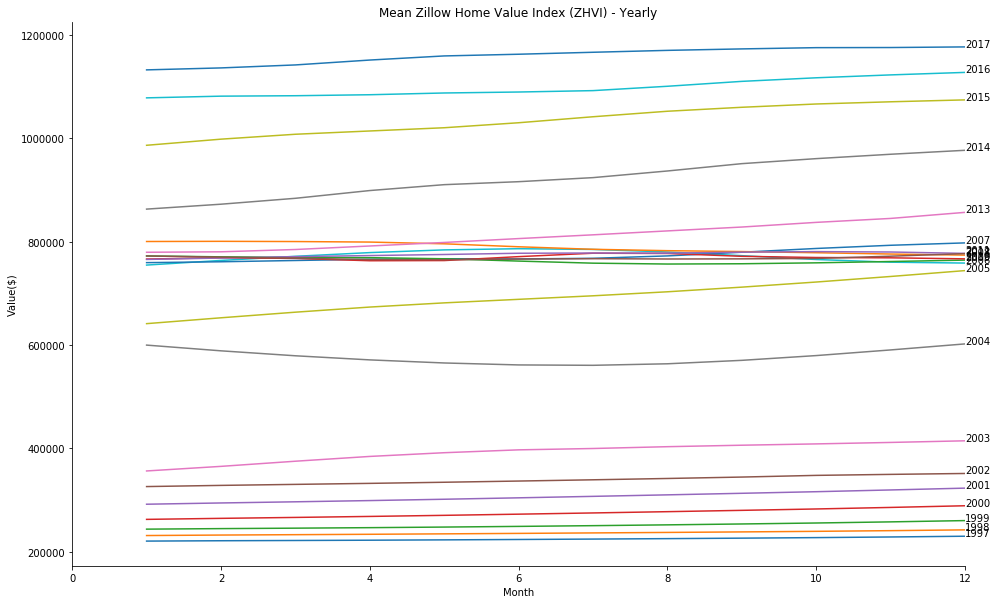

In [21]:
plt.figure(figsize = (16,10))
ax = plt.subplot(111)
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
n_points = yearly.shape[0]
for year in yearly:
    ax.plot(np.arange(n_points-(n_points-1), n_points+1), yearly[year].values, lw=1.5)
    plt.xlim(0, 12)
    y_pos = yearly[year].values[-1] 
    ax.text(n_points, y_pos, year, fontsize=10)
    ax.set_ylabel('Value($)')
    ax.set_xlabel('Month')
    plt.title('Mean Zillow Home Value Index (ZHVI) - Yearly')

In [22]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

In [23]:
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [24]:
print(tableau20)

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), (1.0, 0.4980392156862745, 0.054901960784313725), (1.0, 0.7333333333333333, 0.47058823529411764), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.596078431372549, 0.8745098039215686, 0.5411764705882353), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (1.0, 0.596078431372549, 0.5882352941176471), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.7725490196078432, 0.6901960784313725, 0.8352941176470589), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.7686274509803922, 0.611764705882353, 0.5803921568627451), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.9686274509803922, 0.7137254901960784, 0.8235294117647058), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7803921568627451, 0.7803921568627451, 0.7803921568627451), (0.7372549019607844, 0.7411764705882353, 0.1333

In [25]:
ny_metro = df.loc[df['Metro'] == 'New York']

In [26]:
ny_metro.iloc[:,0:7].nunique()

RegionID      779
Zipcode       779
City          508
State           3
Metro           1
CountyName     25
SizeRank      779
dtype: int64

In [27]:
ny_metro.loc[(df['State'] != 'NY') & (df['State'] != 'NJ')]

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
6375,65470,18428,Blooming Grove,PA,New York,Pike,6376,78300.0,78300.0,78400.0,...,147700,148400,148100,148200,148400,148700,150700,152900,152700,151500
8947,65422,18328,Delaware,PA,New York,Pike,8948,74300.0,74500.0,74600.0,...,123900,125500,127300,128100,127700,126600,127000,128000,128000,127300
10046,65468,18426,Greene,PA,New York,Pike,10047,79500.0,79600.0,79600.0,...,147100,147100,146700,147200,148300,149500,151800,154900,157700,159500
11613,65429,18336,Matamoras,PA,New York,Pike,11614,74400.0,74400.0,74500.0,...,151200,155000,159400,160200,159900,159700,160100,159900,160400,160900
13557,65502,18464,Palmyra,PA,New York,Pike,13558,86100.0,86000.0,85900.0,...,189800,184200,178800,175800,173100,172800,175600,180000,183500,185300
14074,65475,18435,Lackawaxen,PA,New York,Pike,14075,NaN,NaN,NaN,...,137700,139100,140400,140800,141800,143600,146100,148500,148500,147000


In [28]:
nyc.iloc[:,0:7].nunique()

value    252
dtype: int64

In [29]:
san_francisco.iloc[:,0:7].nunique()

RegionID      19
Zipcode       19
City           1
State          1
Metro          1
CountyName     1
SizeRank      19
dtype: int64

In [30]:
ny_suburb.iloc[:,0:7].nunique()

RegionID      298
Zipcode       298
City          228
State           1
Metro           1
CountyName      7
SizeRank      298
dtype: int64

In [31]:
nj_suburb.iloc[:,0:7].nunique()

RegionID      361
Zipcode       361
City          283
State           1
Metro           1
CountyName     12
SizeRank      361
dtype: int64

In [34]:
sf_ts = melt_data(san_francisco)

The Dickey-Fuller Test is a statistical test for testing stationarity. The Null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary. The Dickey-Fuller test is available in stattools from the StatsModels module. 

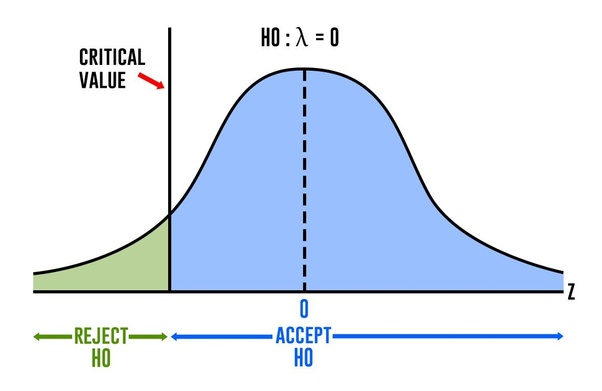

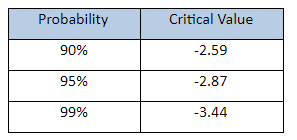

So we can look up for any value of test statistics and say, at the 95% probability level, reject the hypothesis if the test statistics value is less than -2.87 and accept it otherwise.

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(sf_ts['value'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

In [ ]:

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# invert differenced forecast
def inverse_difference(last_ob, value):
	return value + last_ob

# define a dataset with a linear trend
data = [i+1 for i in range(20)]
print(data)
# difference the dataset
diff = difference(data)
print(diff)
# invert the difference
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]
print(inverted)

In [ ]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(sf_ts))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(sf_ts), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
# Drop NaN values from residuals.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
def adfuller_test(ts):
    '''Runs and prints out results for adfuller test on time series in order to check for stationarity.'''
    
    from statsmodels.tsa.stattools import adfuller

    #Perform Dickey-Fuller test:
    dftest = adfuller(ts['value'])

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


adfuller_test(ts_log_decompose)

In [35]:
sf_ts.head()

,value
time,
1996-04-01,394605.263158
1996-05-01,396078.947368
1996-06-01,397673.684211
1996-07-01,399410.526316
1996-08-01,401252.631579


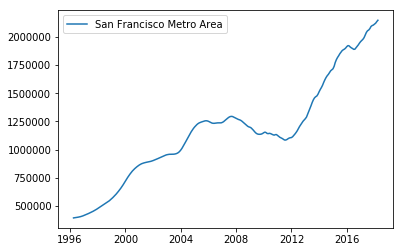

In [36]:

plt.plot(sf_ts, label='San Francisco Metro Area')
plt.legend();

In [ ]:
# ny_year = nyc_ts['2004':'2017'].groupby(pd.Grouper(freq ='A'))
# njsuburb_year = njsuburb_ts['2004':'2017'].groupby(pd.Grouper(freq ='A'))
# nysuburb_year = nysuburb_ts['2004':'2017'].groupby(pd.Grouper(freq ='A'))
# sf_year = sf_ts['2004':'2017'].groupby(pd.Grouper(freq ='A'))

In [ ]:
nyc_ts_select = nyc_ts['2004':'2017']
njsuburb_ts_select = njsuburb_ts['2004':'2017']
nysuburb_ts_select = nysuburb_ts['2004':'2017']
sf_ts_select = sf_ts['2004':'2017']

In [ ]:
#Create a new DataFrame with yearly values stored in columns 
def plot_yearly_ts(ts, boxplot=False):
    
    '''Function takes a time series and groups it into yearly intervals using Grouper;
    Creates a new dataframe where yearly values are into columns to faciliate plotting.'''

    year_group = ts.groupby(pd.Grouper(freq ='A'))
    yearly = pd.DataFrame()
    for year, group in year_group:
        yearly[year.year] = group.values.ravel()
    plt.figure(figsize = (12,12))
    if boxplot:
        yearly.boxplot();
    else:
        ax = plt.subplot(111)
        ax.spines["top"].set_visible(False)  
        ax.spines["right"].set_visible(False)
        n_points = yearly.shape[0]
        for year in yearly:  # get the column names straight off the dataframe
            ax.plot(np.arange(n_points), yearly[year].values, lw=1.5)
            y_pos = yearly[year].values[-1]
            ax.text(n_points, y_pos, year)


# fig, ax = plt.subplots()  # probably unnecessary tbh but I prefer working with the ax obj rather than plt


In [ ]:
plot_yearly_ts(nyc_ts_select)

In [ ]:
# Plot the yearly groups as subplots
nyc_annual.plot(figsize = (12,4), subplots=True, legend=True);

In [ ]:
create_yearly_df(nyc_ts, 'nyc_year')

In [ ]:
long_island_city_zipcodes = [11101, 11102, 11103, 11104, 11105, 11106, 11109, 11120]
lic_select = df.loc[df['Zipcode'].isin(long_island_city_zipcodes)]
lic_ts = melt_data(lic_select)
plt.plot(nyc_ts, label='NYC')
plt.plot(lic_ts, label='Long Island City')
plt.legend()

In [ ]:
soma_zipcodes = [7079, 7040]
soma_select = df.loc[df['Zipcode'].isin(soma_zipcodes)]
soma_ts = melt_data(soma_select)

In [ ]:
williamsburg = df.loc[df['Zipcode'] == 11211]
williamsburg_ts = melt_data(williamsburg)

In [ ]:
carrol_gardens = df.loc[df['Zipcode'] == 11231]
cg_ts = melt_data(carrol_gardens)

In [ ]:
park_slope = df.loc[df['Zipcode'] == 11215]
ps_ts = melt_data(park_slope)

In [ ]:
fort_greene = df.loc[df['Zipcode'] == 11238]
fg_ts = melt_data(fort_greene)

In [ ]:
annual_fg = fg_ts.resample('A').mean()

In [ ]:
year_groups = fg_ts.groupby(pd.Grouper(freq='A'))
#Create a new DataFrame and store yearly values in columns 
fg_annual = pd.DataFrame()

# for yr, group in year_groups:
#     fg_annual[yr.year] = group.values.ravel()
    
# # Plot the yearly groups as subplots
# fg_annual.plot(figsize = (13,8), subplots=True, legend=True);

year_groups.index()

In [ ]:
annual_fg.plot(figsize=(10,3));

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(njsuburb_ts, label='NJ Suburbs')
plt.plot(nyc_ts, label='NYC')
plt.plot(nysuburb_ts, label='NY Suburbs')
plt.title('Mean House Price - Zillow')
plt.xlabel('Years')
plt.ylabel('Price $')
plt.legend();

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(cg_ts['2009':], label='Carrol Gardens')
plt.plot(fg_ts['2009':], label='Fort Greene')
plt.plot(ps_ts['2009':], label='Park Slope')
plt.title('Mean House Price - Zillow')
plt.xlabel('Years')
plt.ylabel('Price $')
plt.legend();

In [ ]:
plt.figure(figsize=(14,4))
plt.plot(lic_ts['2009':], label='Long Island City')
plt.plot(soma_ts['2009':], label='South Orange/Maplewood')
plt.plot(williamsburg_ts['2009':], label='Williamsburg')
plt.title('Surburbs or the City?')
plt.xlabel('Years')
plt.ylabel('Price $')
plt.legend();

In [ ]:
import seaborn as sns
sns.set(style="dark")
plt.figure(figsize=(14,6))
sns.lineplot(data=lic_ts,legend=False)
plt.title('Long Island City Real Estate Price');


In [ ]:
lic_ts.head()

In [ ]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import numpy as np
%matplotlib notebook

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

x = np.array(lic_ts.index)
y = np.array(lic_ts['value'])

fig = plt.figure(figsize=(6,4))
plt.xlim(1996, 2017)
plt.ylim(np.min(lic_ts)[0], np.max(lic_ts)[0])
plt.xlabel('Year',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.title('Long Island City Real Estate Price',fontsize=12)

def animate(i):
    data = lic_ts.iloc[:int(i+1)] #select data range
    p = sns.lineplot(data, color="r")
    p.tick_params(labelsize=6)
    plt.setp(p.lines,linewidth=6)

ani = animation.FuncAnimation(fig, animate, frames=19, repeat=True)


In [ ]:
ny_metro = df.loc[df['Metro'] == 'New York']

In [98]:
# Dictionary to include all zip code time series in NYC Metro Area (no county reference)
zip_dict = {}

# Dictionary of dictionaries
county_dict = {}

# Iterate over all California counties
for c in ny_metro.CountyName.unique():
    # Choose a specific county (wihtin California)
    ny_metro_county = ny_metro[ny_metro.CountyName == c]
    # Note we could keep all the aggregated info for a county w/ 1 time series
    # county_dict_aggregated[c] = melt_data(df_ca_county)
    
    # Create a dictionary that will have time series for each counties' zip
    # Looks something like this:
    # {
    #   '94509': time_series_0,
    #   '94531': time_series_1,
    #    ... 
    # }
    temp_dict_zip = {}
    
    # Now iterate over all the zip codes within that one county
    for z in ny_metro_county.Zipcode.unique():
        # Choosing that specific zip code
        temp_zip_df = ny_metro_county[ny_metro_county.Zipcode == z]
        
        # Creating a time series (via melting) for that zip code
        temp_zip_ts = melt_data(temp_zip_df)
        
        # This will eventually include all the zip codes in the state
        zip_dict[z] = temp_zip_ts
        
        # Adding that time series to a dictionary 
        # (This will only include time series from zip codes in the county)
        temp_dict_zip[z] = temp_zip_ts
        
    # After iterating over all the zip codes in the county, save the dict of
    # zip code time series as a value 
    county_dict[c] = temp_dict_zip

In [ ]:
fig = plt.figure(figsize=(14,4))
plt.plot(county_dict['Essex'][7079], label='South Orange')
plt.plot(county_dict['Essex'][7040], label='Maplewood')
plt.plot(county_dict['Essex'][7042], label='Montclair')
plt.title('Mean House Price NJ Suburbs')
plt.xlabel('Years')
plt.ylabel('Price $')
plt.legend();

In [ ]:
matplotlib.animation.Animation(fig)

In [ ]:
plt.plot(county_dict['Union'][7901], label='Summit')
plt.plot(county_dict['Essex'][7043], label='Upper Montclair')
plt.title('Mean House Price NJ Suburbs')
plt.legend();

In [ ]:
plt.figure(figsize=(14,4))
for z, zipcode in zip(county_dict['Bronx'].keys(), county_dict['Bronx'].values()):
    plt.plot(zipcode, label=z)
plt.legend(loc='best');

In [ ]:
plt.figure(figsize=(14,4))
for z, zipcode in zip(county_dict['Queens'].keys(), county_dict['Queens'].values()):
    plt.plot(zipcode, label=z)
plt.legend(loc='best');

In [ ]:
plt.figure(figsize=(14,4))
for z, zipcode in zip(county_dict['Kings'].keys(), county_dict['Kings'].values()):
    plt.plot(zipcode, label=z)
plt.legend(loc='best');

In [ ]:
plt.figure(figsize=(14,4))
for z, zipcode in zip(county_dict['New York'].keys(), county_dict['New York'].values()):
    plt.plot(zipcode, label=z)
plt.legend(loc='best');

In [ ]:
plt.figure(figsize=(14,4))
for c in county_dict:
    for z, zipcode in zip(county_dict[c].keys(), county_dict[c].values()):
        plt.plot(zipcode, label=z)
plt.legend(loc='best');

# Step 5: ARIMA Modeling

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series,ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series,ax=ax, lags=40);

In [ ]:
import datetime

In [ ]:
(sf_ts.loc[max(sf_ts.index)].value - sf_ts.loc[min(sf_ts.index)].value)/sf_ts.loc[max(sf_ts.index)].value

In [ ]:
sf_ts.drop(columns='ROI Total Period', inplace=True)

In [ ]:
max(sf_ts.index), min(sf_ts.index)

In [ ]:
min(sf_ts.index).value

In [ ]:
sf_ts.head()

In [ ]:
(max(sf_ts.index).value - min(sf_ts.index).value)/min(sf_ts.index).value

In [ ]:
def gain_over_period(ts):
    results = {}
    results['ROI Total Period'] = (max(ts.index).value - min(ts.index).value)/max(ts.index).value
    #results['ROI Last 5 Years'] = [ts.loc[max(ts.index).value - ts.tshift(-60).value/ts.loc[max(ts.index)].value]
    return pd.DataFrame.from_dict(results, orient='columns')

In [ ]:
sf_results = gain_over_period(sf_ts)
sf_results

In [ ]:
nyc_results = gain_over_period(nyc_ts)
nyc_results

In [ ]:
sf_ts.head()

In [ ]:
    ax.text(n_points, y_pos, 'Max Return', color='green', fontsize=10)
    ax.text(n_points, y_pos, 'Lowest Return', color='red', fontsize=10)

In [37]:
def gain(ts):
    roi_2 = (ts - ts.shift(periods=24))/ts.shift(periods=24)*100
    roi_5 = (ts - ts.shift(periods=60))/ts.shift(periods=60)*100
    roi_10 = (ts - ts.shift(periods=120))/ts.shift(periods=120)*100
    plt.figure(figsize = (12,8))
    ax = plt.subplot(111)
    ax.plot(roi_2, label='Return in 2 Years')
    ax.plot(roi_5, label='Return in 5 Years')
    ax.plot(roi_10, label='Return in 10 Years')
    ax.set_ylabel('Gain Percentage')
    ax.set_xlabel('Year')
    plt.yticks([-10,0,10,25,50,75,100,125,150,175,200], [str(x) + "%" for x in [-10,0,10,25,50,75,100,125,150,175,200]], fontsize=10)
    ax.grid(which='major', axis='y', linestyle= "--", lw=0.5, color="black", alpha=0.3)
    plt.title('Mean Zillow Home Value Index (ZHVI) - ROI Over Time Invested', fontsize=14)
    plt.legend()
    plt.show()
    return roi_2, roi_5, roi_10

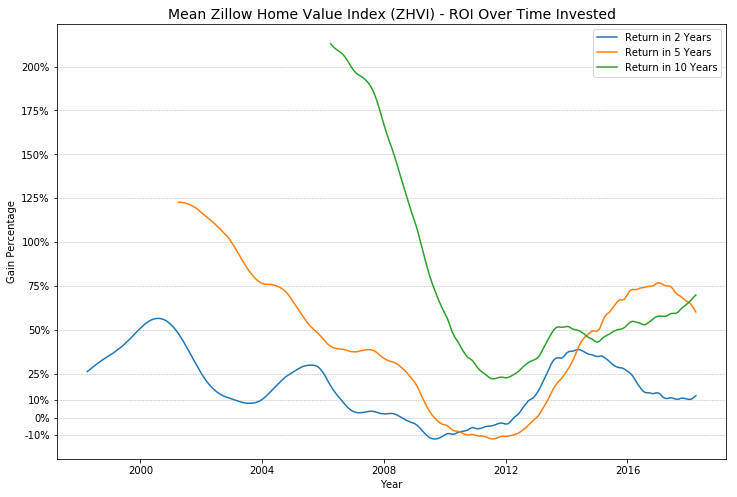

In [38]:
sf_2, sf_5, sf_10 = gain(sf_ts)

In [77]:
sf_ts.value

time
1996-04-01    3.946053e+05
1996-05-01    3.960789e+05
1996-06-01    3.976737e+05
1996-07-01    3.994105e+05
1996-08-01    4.012526e+05
1996-09-01    4.033368e+05
1996-10-01    4.058105e+05
1996-11-01    4.086053e+05
1996-12-01    4.122632e+05
1997-01-01    4.165158e+05
1997-02-01    4.207474e+05
1997-03-01    4.247474e+05
1997-04-01    4.290737e+05
1997-05-01    4.336368e+05
1997-06-01    4.384526e+05
1997-07-01    4.434526e+05
1997-08-01    4.485526e+05
1997-09-01    4.537737e+05
1997-10-01    4.592684e+05
1997-11-01    4.649789e+05
1997-12-01    4.714105e+05
1998-01-01    4.783263e+05
1998-02-01    4.849474e+05
1998-03-01    4.911579e+05
1998-04-01    4.976158e+05
1998-05-01    5.041474e+05
1998-06-01    5.108474e+05
1998-07-01    5.176368e+05
1998-08-01    5.245053e+05
1998-09-01    5.314684e+05
                  ...     
2015-11-01    1.890926e+06
2015-12-01    1.899884e+06
2016-01-01    1.912942e+06
2016-02-01    1.921753e+06
2016-03-01    1.919400e+06
2016-04-01    1.909074e

In [66]:
sf_ts.index

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', name='time', length=265, freq=None)

In [85]:
import plotly as py
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=sf_ts.index, y=sf_ts.value, name='San Francisco',
                         line_color='deepskyblue'))
fig.add_trace(go.Scatter(x=nyc_ts.index, y=nyc_ts.value, name='New York City',
                         line_color='red'))
fig.update_layout(title_text='San Francisco & NYC Zillow Home Value Index',
                  xaxis_rangeslider_visible=True)
fig.show()

In [ ]:
roi.dropna()
roi.plot()

In [ ]:
sf_10years = (sf_ts - sf_ts.shift(periods=120))/sf_ts.shift(periods=120)*100
sf_10years.plot()

In [ ]:
sf_15years = (sf_ts - sf_ts.shift(periods=180))/sf_ts.shift(periods=180)
plt.plot(sf_15years, label='15 years return')
plt.plot(sf_10years)
plt.legend()

In [ ]:
sf_diff = sf_ts.diff()
sf_diff.dropna(inplace=True)
plot_roll(sf_diff)

In [ ]:
def adfuller_test(ts):
    '''Runs and prints out results for adfuller test on time series in order to check for stationarity.'''
    
    from statsmodels.tsa.stattools import adfuller

    #Perform Dickey-Fuller test:
    dftest = adfuller(ts['value'])

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
nyc.isna().sum().sum()

In [ ]:
san_francisco.isna().sum().sum()

We have some NaNs in our New York City data, and we learned that this is because some zipcodes did not exist at the beginning of our data. We will drop any zipcodes that do not have complete data from our analysis.

In [ ]:
# drop NaNs from NYC data
nyc.dropna(inplace=True)

In [ ]:
sf_ts.tshift(-12)

# Step 6: Interpreting Results